Knearest neighbor classifier

In [182]:
#Random examples
X = [[0], [1], [2], [3], [4], [5]]
y = [0, 0, 0, 4, 4, 4]

In [183]:
# looking for classifier which has 2 nearest neighbor
neigh = KNeighborsClassifier(n_neighbors=2)

In [184]:
# fit the model
neigh.fit(X, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [185]:
#predicting the nearest neighbor of 1.2
neigh.predict([[1.2]])

array([0])

In [186]:
neigh.predict([[4.9]])

array([4])

In [187]:
neigh.predict_proba([[1.2]])

array([[1., 0.]])

In [188]:
print(neigh.kneighbors_graph())
# Computes the (weighted) graph of k-Neighbors for points in X

  (0, 1)	1.0
  (0, 2)	1.0
  (1, 2)	1.0
  (1, 0)	1.0
  (2, 3)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (3, 2)	1.0
  (4, 5)	1.0
  (4, 3)	1.0
  (5, 4)	1.0
  (5, 3)	1.0


In [189]:
neigh.score(X, y)
# Returns the mean accuracy on the given test data and labels.

0.8333333333333334

Clustering using KMeans

In [190]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

# metrics for calculate the information between predicted labels and original label
from sklearn import metrics

# the algorithm 
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

# reducing the dimension of data 
from sklearn.decomposition import PCA

# scaling the loaded data; Standardize a dataset along any axis, Center to the mean and component wise scale to unit variance.
from sklearn.preprocessing import scale

In [191]:
np.random.seed(42)

In [192]:
digits = load_digits()
# loading the digits dataset
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [193]:
# stadardlize the data
data = scale(digits.data)
print(data.shape)
n_samples, n_features = data.shape

(1797, 64)


In [194]:
print("digits_target:", digits.target)
n_digits = len(np.unique(digits.target))

digits_target: [0 1 2 ... 8 9 8]


In [195]:
n_digits
# no of digits

10

In [196]:
labels = digits.target
print("Labels:", labels)

Labels: [0 1 2 ... 8 9 8]


In [197]:
sample_size = 300

In [198]:
print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1797, 	 n_features 64


In [199]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    

In [200]:
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.50s	69432	0.602	0.650	0.625	0.465	0.598	0.146
random   	0.38s	69694	0.669	0.710	0.689	0.553	0.666	0.147


In [201]:
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
pca

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [202]:
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
PCA-based	0.06s	70804	0.671	0.698	0.684	0.561	0.668	0.118


In [203]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [204]:
# Plot the decision boundary. For that, we will assign a color to each
h =0.2

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1


In [205]:
# Return coordinate matrices from coordinate vectors.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print("xx:", xx)
print("yy:", yy)

xx: [[-7.99721518 -7.79721518 -7.59721518 ... 10.40278482 10.60278482
  10.80278482]
 [-7.99721518 -7.79721518 -7.59721518 ... 10.40278482 10.60278482
  10.80278482]
 [-7.99721518 -7.79721518 -7.59721518 ... 10.40278482 10.60278482
  10.80278482]
 ...
 [-7.99721518 -7.79721518 -7.59721518 ... 10.40278482 10.60278482
  10.80278482]
 [-7.99721518 -7.79721518 -7.59721518 ... 10.40278482 10.60278482
  10.80278482]
 [-7.99721518 -7.79721518 -7.59721518 ... 10.40278482 10.60278482
  10.80278482]]
yy: [[-7.6750714 -7.6750714 -7.6750714 ... -7.6750714 -7.6750714 -7.6750714]
 [-7.4750714 -7.4750714 -7.4750714 ... -7.4750714 -7.4750714 -7.4750714]
 [-7.2750714 -7.2750714 -7.2750714 ... -7.2750714 -7.2750714 -7.2750714]
 ...
 [10.3249286 10.3249286 10.3249286 ... 10.3249286 10.3249286 10.3249286]
 [10.5249286 10.5249286 10.5249286 ... 10.5249286 10.5249286 10.5249286]
 [10.7249286 10.7249286 10.7249286 ... 10.7249286 10.7249286 10.7249286]]


In [206]:
# np.c_ used for stacked two array
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

In [207]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)

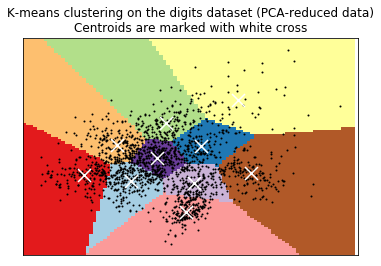

In [215]:
plt.figure(1)
# plt.clf() clears the entire current figure with all its axes, but leaves the window opened, such that it may be reused for other plots.
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()